# Project 2: Customer Exit Prediction

# Introduction:

*   In this project, you will predict whether a customer will exit (CustomerExit) based on various service and demographic features.
*   You will conduct data exploration, preprocessing, and train machine learning models to predict customer exit.
*   Finally, you'll evaluate the models using classification metrics.

**Datasets Locations and Names:** Canvas -> Modules -> Week 5 -> Dataset -> "customer_exit.csv".

Please save your Google Colab project as FirstName_LastName_Project2.ipynb and submit (upload) your source code to Canvas.

# **Practical Tip (for Colab users without GPU/with limited resources):**
If runtime is too slow, you may use stratified sampling to work with a smaller subset of the dataset (e.g., 50k–100k rows) for EDA, training, evaluation, and GridSearchCV.
Once you have selected your best model and hyperparameters, retrain and evaluate your final model on the full dataset and report those results in your conclusion.

# Dataset Description:

* **Usage Frequency:** How often the customer uses the service.
* **Support Calls:** Number of support calls made by the customer.
* **Payment Delay:** How often the customer uses the service.
* **Contract Length:** Type of contract (e.g., month-to-month, yearly).
* **SubscriptionType:** Type of subscription (e.g., Basic, Premium, Standard).
* **MembershipDuration**: How many months the customer has been with the service.
* **CumulativeCharges:** Total amount billed to the customer.
* **Age:** Age of the customer.
* **Gender:** Gender of the customer.
* **Last Interaction:** Number of days since the customer's most recent support request.
* **CustomerExit:** The target variable, indicating whether the customer left (1 = exit, 0 = stays).

# Task 1: Exploratory Data Analysis (EDA)
* Visualize the distribution of the target variable (`CustomerExit`).
* Create scatter plots or histograms to explore relationships between features.
* Check for missing values.

In [ ]:
# Your EDA code here


##different libraries that might or might not be used, just putting all the ones we
### have learned just in case

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd


from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedShuffleSplit

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

from sklearn.impute import SimpleImputer

from sklearn.svm import SVR


from google.colab import drive
drive.mount('/content/drive')

customer = pd.read_csv("drive/My Drive/Machine_Learning/customer_exit.csv")



Mounted at /content/drive


In [ ]:
##Customer info
#Basic
print ("Customer info: ")
customer.info()

Customer info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505206 entries, 0 to 505205
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  505206 non-null  int64  
 1   gender               505206 non-null  object 
 2   membership_duration  505206 non-null  float64
 3   usage_frequency      505206 non-null  float64
 4   support_calls        505206 non-null  float64
 5   payment_delay        505206 non-null  float64
 6   subscription_type    505206 non-null  object 
 7   contract_length      505206 non-null  object 
 8   cumulative_charges   505206 non-null  float64
 9   last_interaction     505206 non-null  float64
 10  customer_exit        505206 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 42.4+ MB


In [ ]:
##Customer Info
## to see if it works
customer.head()

,age,gender,membership_duration,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,cumulative_charges,last_interaction,customer_exit
0,18,Male,5.0,20.0,1.0,3.0,Basic,Quarterly,421.00,15.0,1.0
1,33,Female,38.0,28.0,7.0,8.0,Premium,Quarterly,577.00,11.0,0.0
2,18,Male,16.0,21.0,1.0,11.0,Basic,Quarterly,792.85,6.0,0.0
3,49,Female,57.0,12.0,2.0,7.0,Premium,Quarterly,590.65,7.0,0.0
4,22,Female,26.0,2.0,4.0,23.0,Standard,Monthly,811.00,14.0,1.0


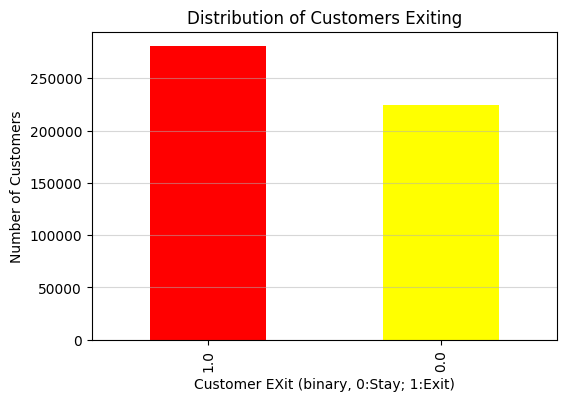

In [ ]:
##Bar graph to visualize the distrubution of the target variable "customer_exit"
###In this case, how many of the customers are exiting or not

plt.figure (figsize=(6,4))
customer ['customer_exit'].value_counts().plot(kind='bar', color=['red','yellow'])

plt.title('Distribution of Customers Exiting')

plt.xlabel ('Customer EXit (binary, 0:Stay; 1:Exit)')
plt.ylabel ('Number of Customers')


plt.grid (axis='y', alpha=0.5)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

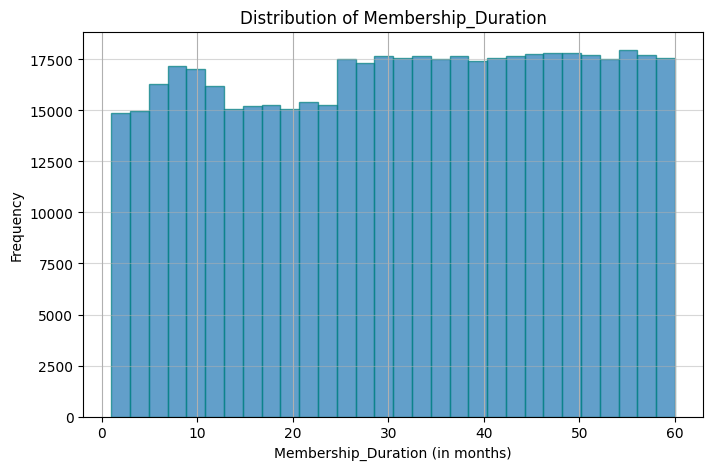

In [ ]:
##histogram plot to "explore relationships between the featues"


plt.figure (figsize=(8,5))
customer ['membership_duration'].hist(bins = 30, edgecolor = 'teal', alpha = 0.7)

plt.title ('Distribution of Membership_Duration')
plt.xlabel('Membership_Duration (in months)')
plt.ylabel ('Frequency')
plt.grid (axis='y', alpha =0.5)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x500 with 0 Axes>

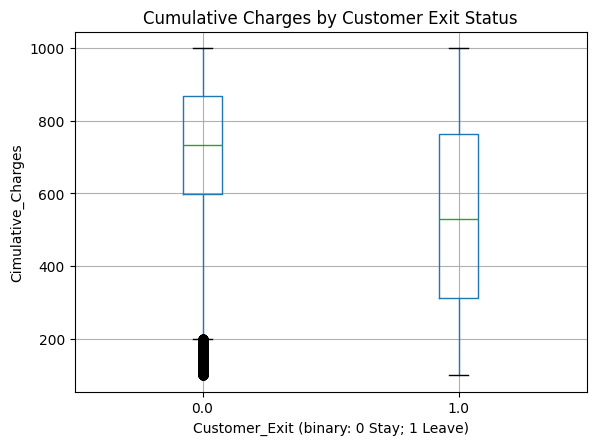

In [ ]:
## box plot to "explore relationships between the featues"

plt.figure (figsize =(8,5))
customer.boxplot(column = 'cumulative_charges', by = 'customer_exit', grid = True)
plt.title ('Cumulative Charges by Customer Exit Status')

##added this so it doesn't show the "box plot grouped by..."

plt.suptitle('')
plt.xlabel('Customer_Exit (binary: 0 Stay; 1 Leave)')
plt.ylabel ('Cimulative_Charges')
plt.show

In [ ]:
###Now that we explored relationships between features,
## check if there are missing values

print ("Missing values?: " )

missing_values = customer.isnull().sum()


print (missing_values[missing_values >0])

Missing values?: 
Series([], dtype: int64)


# Task 2: Data Preprocessing with Pipelines and Feature Extraction
* Use Pipeline for handling missing values, scaling, and feature extraction.
* Use ColumnTransformer for applying different transformations to numeric and categorical features.

In [ ]:
# Your data preprocessing code here
##divide the data: numbers vs categorical entities

numer_values = ['usage_frequency','support_calls','payment_delay', 'membership_duration',
               'cumulative_charges', 'age','last_interaction']
categorical_values = ['contract_length','subscription_type' , 'gender']

## transformers

number_trans = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())
])


#### 'ignore' is for bug fix,
##seems to help the pipeline not fail when a new entity appears during testing

categorical_trans = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'most_frequent')),
 ('onehot', OneHotEncoder(handle_unknown='ignore'))])


## a column only for transformations
###this to make transformations available for different columns

preprocessor = ColumnTransformer(transformers= [('number', number_trans, numer_values),
 ('categorical', categorical_trans, categorical_values)], remainder= 'passthrough')


###splitting the data so there is a test and train set

X = customer.drop ('customer_exit', axis=1)
Y = customer['customer_exit']

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X, Y, test_size=0.2, random_state = 42, stratify = Y)



print (f"Shape of X_TRAIN: \n{X_TRAIN.shape}\n")


print (f"Shape of X_TEST: \n{X_TEST.shape}")

Shape of X_TRAIN: 
(404164, 10)

Shape of X_TEST: 
(101042, 10)


# Task 3: Train Classification Models
Train at least 5 classification models within a pipeline:

In [ ]:
##Stratified sample (only the first 50k rows)
##bug fix so I could do task 3
strat = 50000

X_strat = X.head(strat).copy()
Y_strat = Y.head(strat).copy()

print (f"Original X shape: {X.shape}")
print (f"Stratified shape of X: {X_strat.shape}")

print ("\n\nStratified target distribution: \n")
print (Y_strat.value_counts(normalize = True))

Original X shape: (505206, 10)
Stratified shape of X: (50000, 10)


Stratified target distribution: 

customer_exit
1.0    0.55718
0.0    0.44282
Name: proportion, dtype: float64


In [ ]:
# Your model training code here


Task3_num_trans = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'median')),
 ('scalers', StandardScaler()) ])

Task3_categorical_trans = Pipeline(steps =[('imputer', SimpleImputer(strategy='most_frequent')),
 ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer ( transformers = [ ('num', Task3_num_trans, numer_values),
 ('cat', Task3_categorical_trans, categorical_values)])

##BUGFIX


X_TRAIN_strat, X_TEST_strat, Y_TRAIN_strat, Y_TEST_strat = train_test_split (X_strat, Y_strat, test_size = 0.2, random_state= 42, stratify= Y_strat)

#check bug fix

print(f"Stratified training data size:\n {X_TRAIN_strat.shape[0]}\n\n")
print(f"Stratified test data size: \n {X_TEST_strat.shape[0]}\n")

## the 5 different models within a pipline:

models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver = 'liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "random Forest": RandomForestClassifier(random_state = 42, n_estimators = 100),
    "Support Vector Machine(Linear)": SVC(kernel='linear', random_state=42)

}

pipelines = {}
for differentNames, model in models.items():
    # Full pipeline: Preprocessing -> Model
    pipelines[differentNames] = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', model)])

    pipelines [differentNames].fit(X_TRAIN_strat, Y_TRAIN_strat)
    print (f"{differentNames} model trained")




Stratified training data size:
 40000


Stratified test data size: 
 10000

Logistic Regression model trained
K-Nearest Neighbors model trained
Decision Tree model trained
random Forest model trained
Support Vector Machine(Linear) model trained


# Task 4: Model Evaluation
* Evaluate your models using k-fold cross-validation (at least 5 folds) to assess how well the models generalize.
* Calculate and report the average accuracy, precision, recall, specificity, and F1-score from the cross-validation.
* Compare and discuss models based on their cross-validated performance.


In [ ]:
# Your model evaluation code here

detailedScorer = make_scorer (recall_score, pos_label =0)

scoreEntity={ 'accuracy': 'accuracy', 'precision': 'precision', 'recall':'recall',
        'f1':'f1', 'specificity': detailedScorer}


##due the kfolds on ALL pipelines

endResults = {}
FIVE_FOLDS = 5

print (f"\n Doing 5 kfolds")

for Knames, pipeline in pipelines.items ():

  Kscores = cross_validate (pipeline, X_strat, Y_strat, cv = FIVE_FOLDS,
                            scoring = scoreEntity, n_jobs =-1)
  endResults[Knames] = Kscores

  print (f"Cross Validation for {Knames} completed!")

def SHOW_CV (end_results):

  metrics = ['accuracy', 'precision', 'recall', 'specificity', 'f1']
  SummaryOFdata = {}

  for NEWname, Kscores in endResults.items():
    scoresAVG = {}
    for metric in metrics:
      scoresAVG[metric] = np.mean(Kscores[f'test_{metric}'])
    SummaryOFdata[NEWname]= scoresAVG


  summary_kfold = pd.DataFrame(SummaryOFdata).T
  summary_kfold = summary_kfold.sort_values(by='f1', ascending=False)

  print ("\n Cross validation: summary of performance(for 5 folds)")
  print (summary_kfold.to_string(float_format ="%.4f"))

  return summary_kfold


summary_kfold = SHOW_CV(endResults)

bestMODEL = summary_kfold.index[0]

print (f"\nThe best model, based on the F1-score, is: {bestMODEL}")











 Doing 5 kfolds
Cross Validation for Logistic Regression completed!
Cross Validation for K-Nearest Neighbors completed!
Cross Validation for Decision Tree completed!
Cross Validation for random Forest completed!
Cross Validation for Support Vector Machine(Linear) completed!

 Cross validation: summary of performance(for 5 folds)
                                accuracy  precision  recall  specificity     f1
random Forest                     0.9028     0.8934  0.9374       0.8593 0.9149
K-Nearest Neighbors               0.8583     0.8850  0.8571       0.8598 0.8708
Support Vector Machine(Linear)    0.8473     0.8794  0.8415       0.8547 0.8600
Logistic Regression               0.8448     0.8752  0.8414       0.8491 0.8580
Decision Tree                     0.8200     0.8418  0.8336       0.8028 0.8377

The best model, based on the F1-score, is: random Forest


# Task 5: Hyperparameter Tuning with GridSearchCV
* Apply GridSearchCV to your best model for hyperparameter tuning.

In [ ]:
##applying GridSearchCV to random forest (Since it is the best model according to part 4)


bestMODEL_name = "random Forest"
best_pipeline = pipelines[bestMODEL_name]

print (f"\n Using hyperparameter tuning using GridSearchCV on {bestMODEL_name}\n\n")


grid1 = {

         'classifier__n_estimators':[50,100,200],
         'classifier__max_depth':[10,20,None],
         'classifier__min_samples_split': [2,5]

}

f1_scorer = make_scorer(f1_score)

grid1_search = GridSearchCV (

                             estimator = best_pipeline,
                             param_grid = grid1,
                             scoring = f1_scorer,
                             cv = 3,
                             verbose = 1,
                             n_jobs = -1
)


grid1_search.fit(X_TRAIN_strat, Y_TRAIN_strat)

##grid search CV

print ("\nGridSearchCV best score (f1): {:.4f}".format(grid1_search.best_score_))


print ("\n\nGridSearchCV best parameters:  ")

print(grid1_search.best_params_)

BESTestimator = grid1_search.best_estimator_

Y_pred = BESTestimator.predict(X_TEST_strat)

testACCURACY = accuracy_score(Y_TEST_strat, Y_pred)


F1test = f1_score (Y_TEST_strat, Y_pred)

##print the test accuracy

print (f"\nTest accuracy: {testACCURACY: .4f}")



##print the test f1-score

print (f"\n\nTest f1-score: {F1test: .4f}")








 Using hyperparameter tuning using GridSearchCV on random Forest


Fitting 3 folds for each of 18 candidates, totalling 54 fits

GridSearchCV best score (f1): 0.9137


GridSearchCV best parameters:  
{'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Test accuracy:  0.9077


Test f1-score:  0.9189


# Conclusion:
* Summarize your findings and explain any interesting insights from your analysis.

My findings:


For tasks 1 and 2 = I found that there was a specific correlation between those who left or stayed, and the amount of money they would get charged. Seemed like it has a direct correlation.

Task 3: I needed to use a stratified sample, so instead of 500k, I used 50k.

The following models were trained in task 3:

Logistic Regression model trained

K-Nearest Neighbors model trained

Decision Tree model trained

random Forest model trained

Support Vector Machine(Linear) model trained



Task 4: The kfold was performed 5 times, and it was found that the best model is "random Forest"


Task 5: Since the best model is "random Forest", I applied GridSearchCV with it to hyperparameter tune it. It was found that the f1 score and the test accuracy are pretty close together, meaning that the dataset (at least the stratified, 50k version) is pretty well balanced.



